In [1]:
cd ..

In [82]:
import torch
import torch.nn.functional as F
from model import Generator, Discriminator, DCGAN
from utils import create_dataset, init_params, inspect_tensor
from torchvision.utils import make_grid, save_image
from torch.utils.data.dataloader import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
from skimage.io import imread
import seaborn as sns
import moviepy.editor as mpy
from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
def show_image_grid(tensor, figsize=(10, 5), **kwargs):
    _, ax = plt.subplots(figsize=figsize)
    ax.imshow(make_grid(tensor, normalize=True, **kwargs).data.numpy().transpose([1,2,0]))
    
def plot_hist(sample):
    fig, ax = plt.subplots(figsize=(2,1))
    ax.hist(sample.data.numpy().flatten(), bins=25)
    fig.show();

In [68]:
dcgan = torch.load(f'train_backup/checkpoint_846.pt')
dcgan.generator.eval()

#z_sample = dcgan.generator.z_sample(batch_size=64)

Generator(
  (linear): Linear(in_features=100, out_features=51200, bias=True)
  (deconv_block): Sequential(
    (0): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): ReLU()
    (2): StandardConvTranspose2d(512, 256, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU()
    (5): StandardConvTranspose2d(256, 128, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), output_padding=(1, 1))
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU()
    (8): StandardConvTranspose2d(128, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): StandardConvTranspose2d(64, 3, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), output_padding=(1, 1))
  )
)

In [69]:
gen_sample = dcgan.generator(z_sample).data

In [70]:
gen_sample.shape

torch.Size([64, 3, 150, 150])

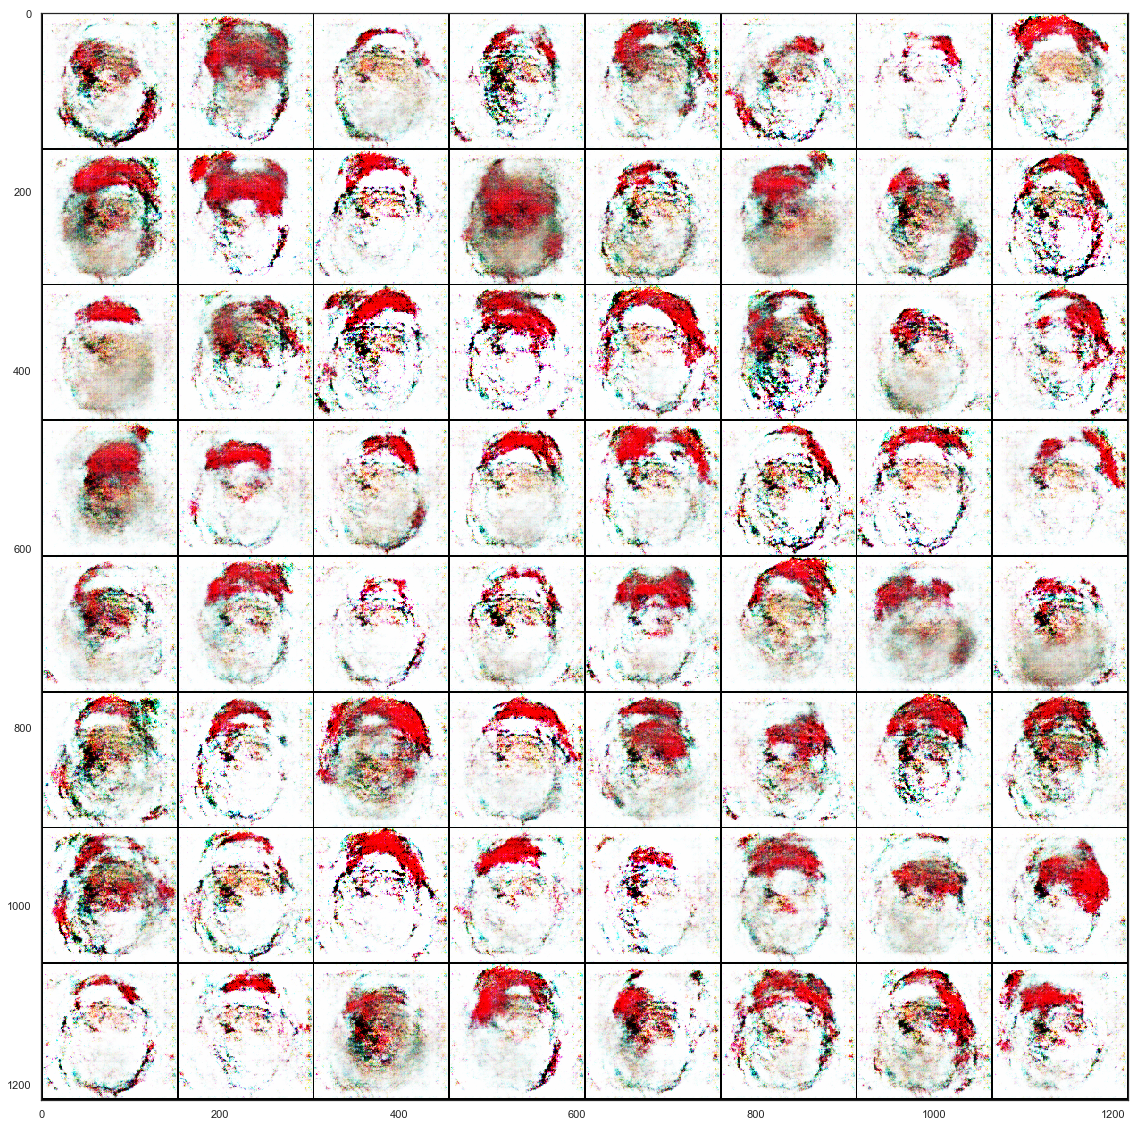

In [71]:
show_image_grid(gen_sample, figsize=(20,20))

In [72]:
top_santas = [2,3,7,8,10,20,29,43,40,49,16,62]

In [46]:
np.save('z_sample_array.npy', gen_sample[top_santas].numpy())

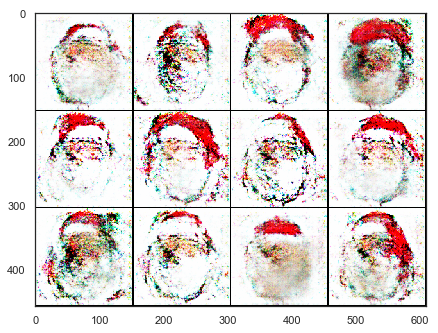

In [73]:
show_image_grid(gen_sample[top_santas], figsize=(7,7), nrow=4)

In [83]:
path = Path('gif')

In [65]:
for i in range(6, 78, 6):
    dcgan = torch.load(f'train/checkpoint_{i}.pt')
    dcgan.generator.eval()
    gen_sample = dcgan.generator(z_sample).data
    image_grid = make_grid(gen_sample[top_santas], normalize=True, nrow=4)
    save_image(image_grid, path / f'gif_input_{i}.jpg')

In [74]:
results = []

for i in range(6, 900, 60):
    dcgan = torch.load(f'train_backup/checkpoint_{i}.pt')
    dcgan.generator.eval()
    gen_sample = dcgan.generator(z_sample).data
    image_grid = make_grid(gen_sample[top_santas], normalize=True, nrow=4)
    save_image(image_grid, path / f'gif_input_{i}.jpg')

In [126]:
file_list = sorted([str(f.resolve()) for f in path.glob('*.jpg')], key=lambda x: int(x[49:52].strip('.j')))

clip = mpy.ImageSequenceClip(file_list, fps=2)
clip.write_gif(path / 'output.gif', fps=2)


[MoviePy] Building file gif\output.gif with imageio


 95%|█████████████████████████████████████████████████████▏  | 19/20 [00:05<00:00,  3.32it/s]
